In [1]:
# standard stuff
import numpy as np
import pandas as pd

# extra stuff
from scipy.stats import multivariate_normal, t, norm
from sklearn import datasets

# plotting stuff
import matplotlib.pyplot as plt
import seaborn as sns
import imageio

# math functions
from scipy.special import gamma, digamma

# my stuff
from assignment3.mixture_models import *

# Gaussian Mixture Models

Here we have some results and save some images and gifs to go with the accompanying pdf. 

In [33]:
df = pd.read_csv('data/old_faithful.csv',index_col = 0,sep='\s+')
df.head()


,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85


In [5]:
%matplotlib inline

Convergence has been reached. Iterations terminated.
Final Convergence Results.


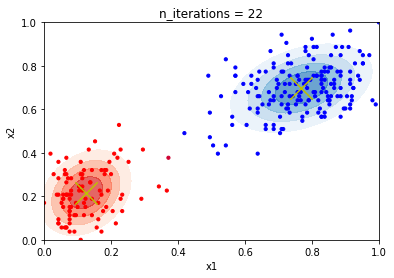

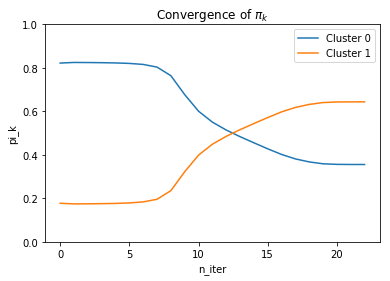

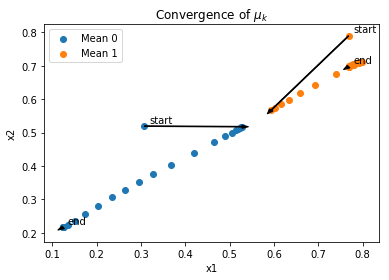

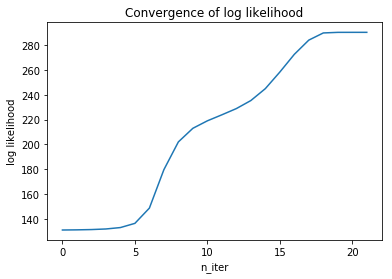

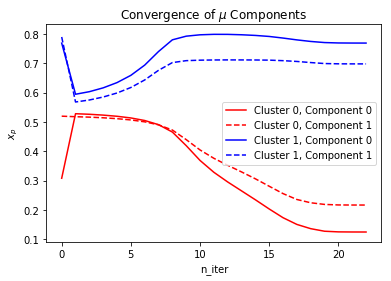

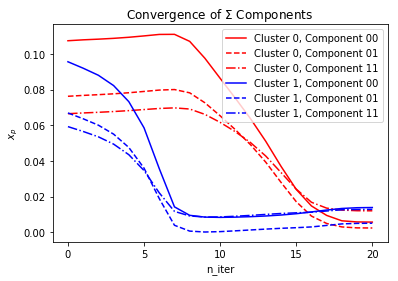

In [36]:
#%matplotlib qt
test = GMM(df,2)
test.fit(25)
plot_convergence(test,plot_2d_contours, distribution='gaussian')

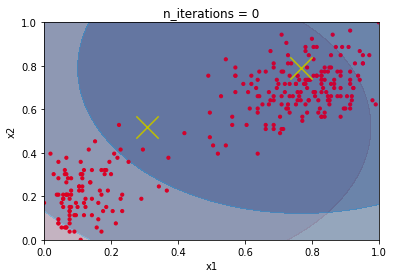

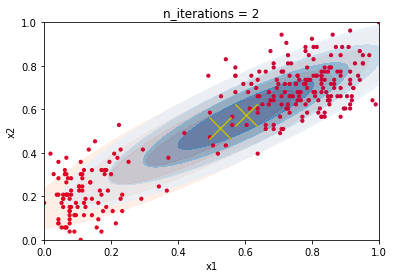

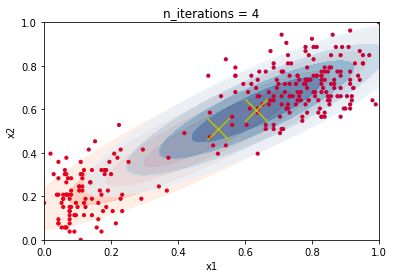

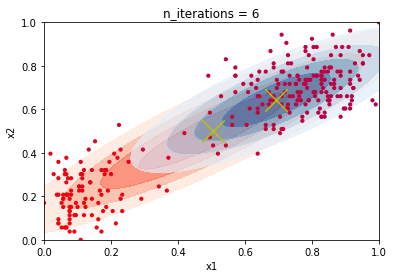

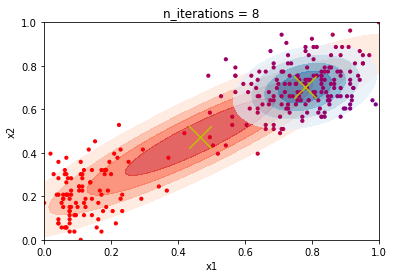

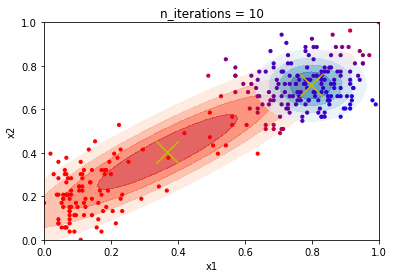

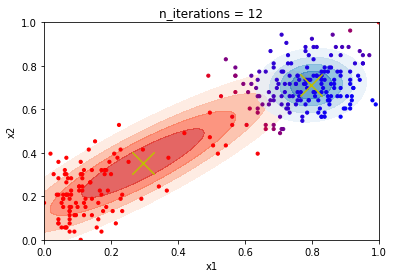

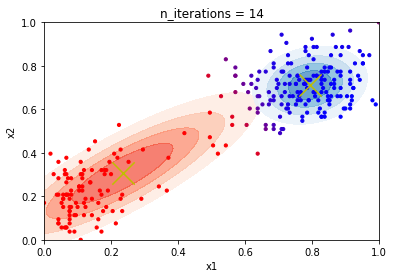

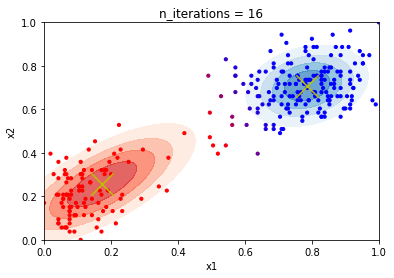

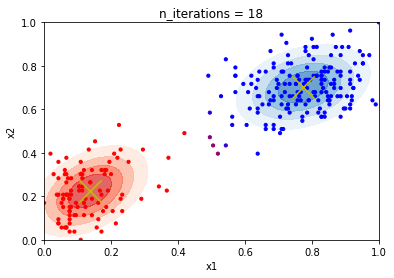

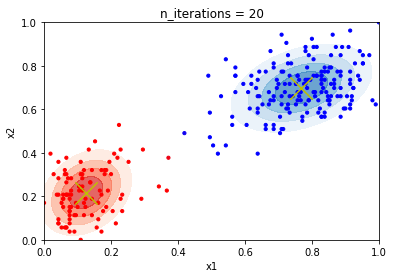

Convergence has been reached. Iterations terminated.
Final Convergence Results.


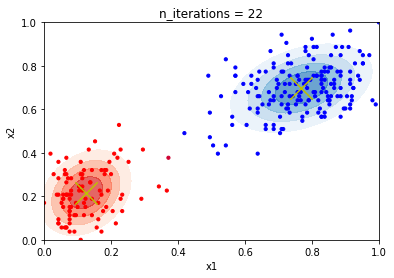

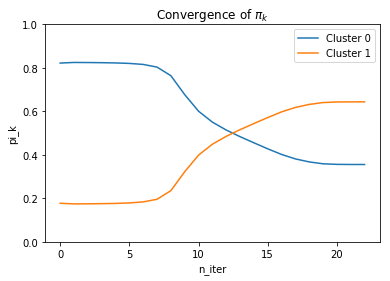

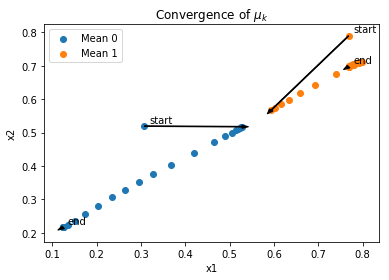

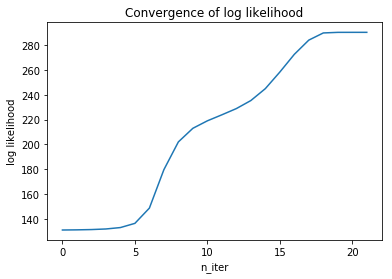

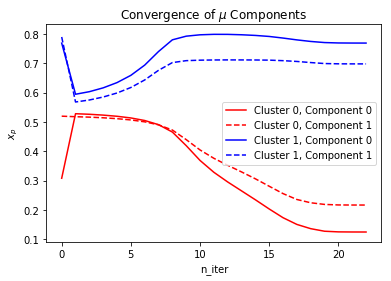

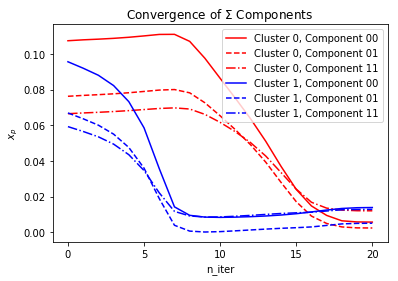

In [38]:
# set up model and test it out
test = GMM(df,2)
plot_2d_contours(test)

while not test.converged:
    test.fit(2)
    if not test.converged:
        plot_2d_contours(test,display=True)

plot_convergence(test,plot_2d_contours)

In [ ]:
# make a gif
test = GMM(df,2)
plot_contours(test)

im_list = []

while not test.converged:
    test.fit(1)
    im_list.append(plot_contours(test,display=False, save = True))
    
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])

im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])

imageio.mimsave('./figures/converging.gif',im_list, fps=8, loop=0)

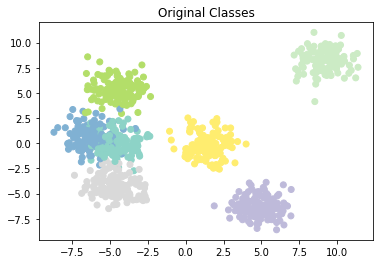

In [430]:
# Different Data Sets
n_centers = 7
n_data = 1000
n_train = 900

x,y = datasets.make_blobs(n_data, centers = n_centers)

fig1,ax1 = plt.subplots()
plt.scatter(x[np.arange(n_train),0],x[np.arange(n_train),1],c=y[np.arange(n_train)],cmap=plt.cm.Set3)
plt.title('Original Classes')

x_df = pd.DataFrame(x)

In [ ]:
# make a gif
test = GMM(x_df,n_centers)
plot_contours(test)

im_list = []

while not test.converged:
    test.fit(1)
    im_list.append(plot_contours(test,display=False,save = True))
    
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])

im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])

#imageio.mimsave('./figures/converging.gif',im_list, fps=8, loop=0)

Final Convergence Results.


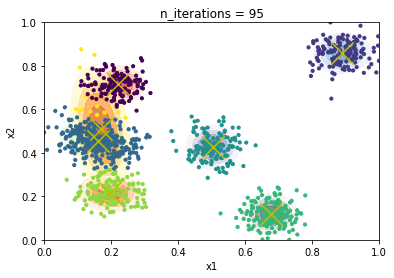

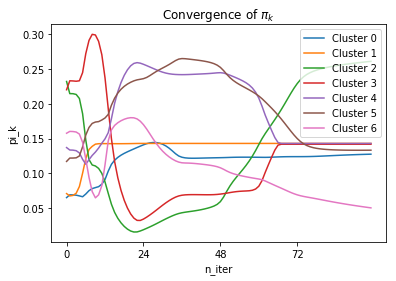

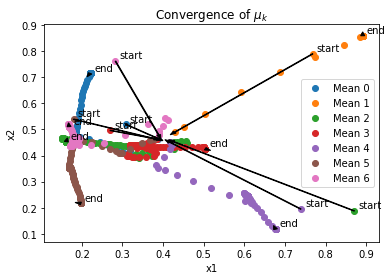

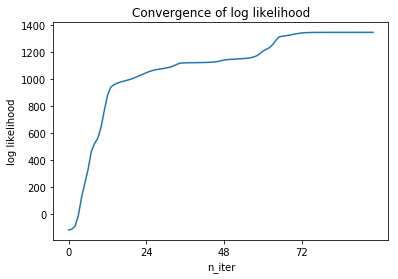

In [432]:
imageio.mimsave('./figures/converging_fun.gif',im_list, fps=10, loop=0)

plot_convergence(test,plot_2d_contours)

# T-Distribution Mixture Models

Here we look at 1D T-Distributions and develop an EM method for these instead of Gaussian. For now, note that the value of v is fixed for each model, and not solved for in the update step.

In [143]:
#1D t-distribution mixtures
n_data = 1000
dist = t
mu_list = [-7, -3, 0, 4, 9]
sigma_list = [2, 0.5, 1, 0.6, 0.7]
v_list = [5, 5, 5, 5, 5]
pi_list = [0.1, 0.3, 0.2, 0.3, 0.1]
t_list = np.arange(len(mu_list))
x = []
x_individuals = []
for idx in t_list:
    x_individuals.append([])

for ii in range(n_data):
    idx = np.random.choice(t_list, size=1, replace=True, p=pi_list)[0]
    mu = mu_list[idx]
    sigma = sigma_list[idx]
    v = v_list[idx]
    dist1 = dist(loc=mu, scale=sigma, df=v)
    x_new = dist1.rvs(size=1)[0]
    x_individuals[idx].append(x_new)
    x.append(x_new)

In [144]:
# Plot the original data to compare to
%matplotlib qt
#%matplotlib inline

x_dist = np.arange(min(x), max(x), 0.01)
y = np.zeros(x_dist.shape)
colors = ['g','c','y','b','r','r', 'b', 'g', 'y', 'c', 'm', 'k']
fig,ax = plt.subplots()
for idx in t_list:
    min_val = min(x)
    max_val = max(x)
    n_bins = 50
    step = (max_val-min_val)/n_bins
    bins = np.arange(min_val,max_val+step,step)
    mu = mu_list[idx]
    sigma = sigma_list[idx]
    v = v_list[idx]
    pi = pi_list[idx]
    dist = t(loc=mu, scale=sigma, df=v)
    y += pi*dist.pdf(x_dist)
    z = dist.pdf(x_dist)
    plt.plot(x_dist, max(np.histogram(x_individuals[idx],bins=bins)[0])*z/max(z), c=colors[idx])    
    #plt.hist(x_individuals[idx], color=colors[idx], alpha=0.5, bins=bins, stacked=True)
    plt.xlabel('x')
    plt.ylabel('PDF')
    plt.title('TRUE CLUSTERS')
plt.hist(x_individuals, color=colors[0:len(t_list)], alpha=0.5, bins=bins, stacked=True)
plt.plot(x_dist, max(np.histogram(x,bins=bins)[0])*y/max(y), c='k') 
# Used to return the plot as an image array
fig.canvas.draw()  # draw the canvas, cache the renderer
image_true = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
image_true = image_true.reshape(fig.canvas.get_width_height()[::-1] + (3,))
plt.show()

#plt.hist(x,bins=bins)
#plt.plot(x_dist, max(np.histogram(x,bins=bins)[0])*y/max(y), c='k') 
#plt.xlabel('x')
#plt.ylabel('PDF')
#plt.title('No Labels')
#plt.show()

In [89]:
plt.hist(x,bins=bins)
#plt.plot(x_dist, max(np.histogram(x,bins=bins)[0])*y/max(y), c='k') 
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('No Labels')
plt.show()

In [43]:
def plot_1d_contours(model, distribution='gaussian', x1label='x', display=True, save=False):
    fig, ax = plt.subplots()

    # assumes 1d data, but any number of clusters
    # chooses hard classes

    class_list = np.argmax(model.gamma_kn, axis=0)

    min_val = min(model.x)
    max_val = max(model.x)
    x = np.arange(min_val, max_val, 0.01)
    n_bins = 50
    step = (max_val - min_val) / n_bins
    bins = np.arange(min_val, max_val + step, step)

    # plot PDFs first
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k']
    x_individuals=[]
    y_total = np.zeros(x.shape)
    for kk in range(model.k):
        mu = model.mu_k[kk]
        x_k = model.x[class_list == kk]
        x_individuals.append(x_k)
        variance = model.sigma_k[kk]
        pi = model.pi_k[kk]

        if distribution == 'gaussian':
            dist = norm(loc=mu, scale=np.sqrt(variance))
            y = dist.pdf(x).ravel()
            y1 = np.max(np.histogram(x_k,bins=bins)[0])*y/max(y)

        if distribution == 't':
            v = model.v[kk]
            dist = t(loc=mu, scale=np.sqrt(variance), df=v)
            y = dist.pdf(x).ravel()
            y1 = np.max(np.histogram(x_k,bins=bins)[0])*y/max(y)
            
        y_total += pi*y

        plt.plot(x, y1, c=colors[kk])
        #plt.hist(x_k, color=colors[kk], alpha=0.5, bins=bins)

    plt.hist(x_individuals, color=colors[0:model.k], alpha=0.5, bins=bins, stacked=True)
    plt.plot(x, np.max(np.histogram(model.x,bins=bins)[0])*y_total/max(y_total), c='k')  
    plt.xlabel(x1label)
    plt.ylabel('PDF')
    plt.title('n_iterations = {:d}'.format(model.current_iter))
    # plt.xlim([0, 1])
    # plt.ylim([0, 1])

    # Used to return the plot as an image array
    fig.canvas.draw()  # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    if display:
        plt.show()

    if save:
        plt.close()
        return image

In [91]:
# set up model and test it out
x_train = np.array(x).reshape(-1,1)
test = TMM(x_train,5, vlist = v_list)
plot_1d_contours(test, distribution = 't')

while not test.converged:
    test.fit(2)
    if not test.converged:
        plot_1d_contours(test,distribution = 't', display=True)

plot_convergence(test,plot_1d_contours)

Convergence has been reached. Iterations terminated.
Final Convergence Results.


Final Convergence Results.


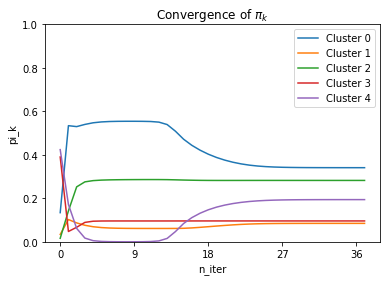

In [145]:
%matplotlib inline
plot_convergence(test,plot_1d_contours)

In [140]:
# Check how close we were to the right solution
found_pi = test.pi_k
found_sigma = test.sigma_k
found_mu = test.mu_k.ravel()

sort_order = np.argsort(found_mu)

for kk in t_list:
    tmean = mu_list[kk]
    fmean = found_mu[sort_order[kk]]
    tpi = pi_list[kk]
    fpi = found_pi[sort_order[kk]][0]
    tsigma = sigma_list[kk]
    fsigma = found_sigma[sort_order[kk]][0][0]
    print("--------------------------------------")
    print("Cluster %d " % kk)
    print("        True    Expected   % Difference")
    print("Mean    {: 0.2f}   {: 0.2f}      {:0.2f}".format(tmean,fmean,np.abs((tmean-fmean)/tmean)))
    print("Sigma   {: 0.2f}   {: 0.2f}      {:0.2f}".format(tsigma,fsigma,np.abs((tsigma-fsigma)/tsigma)))
    print("Weight  {: 0.2f}   {: 0.2f}      {:0.2f}".format(tpi,fpi,np.abs((tpi-fpi)/tpi)))

--------------------------------------
Cluster 0 
        True    Expected   % Difference
Mean    -7.00   -7.35      0.05
Sigma    2.00    2.47      0.24
Weight   0.10    0.09      0.15
--------------------------------------
Cluster 1 
        True    Expected   % Difference
Mean    -3.00   -2.96      0.01
Sigma    0.50    0.28      0.43
Weight   0.30    0.34      0.14
--------------------------------------
Cluster 2 
        True    Expected   % Difference
Mean     0.00    0.18      inf
Sigma    1.00    0.88      0.12
Weight   0.20    0.19      0.03
--------------------------------------
Cluster 3 
        True    Expected   % Difference
Mean     4.00    3.98      0.01
Sigma    0.60    0.34      0.44
Weight   0.30    0.28      0.06
--------------------------------------
Cluster 4 
        True    Expected   % Difference
Mean     9.00    8.98      0.00
Sigma    0.70    0.41      0.42
Weight   0.10    0.10      0.04


C:\Users\linds\Anaconda3\envs\datascience\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


In [ ]:
# make a gif
x_train = np.array(x).reshape(-1,1)
test = TMM(x_train, 5, vlist = v_list)
plot_1d_contours(test)

im_list = []

while not test.converged:
    test.fit(1, conv_tol = 1e-5)
    im_list.append(plot_1d_contours(test,distribution = 't', display=False, save = True))
    

plot_convergence(test,plot_1d_contours,distribution='t')


#imageio.mimsave('./figures/t_distribution_1d.gif',im_list, fps=8, loop=0)

In [85]:
im_end = im_list[-1]
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])
im_list.insert(0,im_list[0])

im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])

im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)
im_list.append(im_end)

im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)
im_list.append(image_true)

im_list.append(im_end)
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])
im_list.append(im_list[-1])



imageio.mimsave('./figures/t_distribution_1d.gif',im_list, fps=8, loop=0);